In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
import seaborn
from statsmodels.stats import multitest 

# Clustering

In [2]:
# load in csv to look at 
annot = pd.read_csv("all_annotated.csv")
annot

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [3]:
# limiting dataset to median expression across 
med_vals = annot[annot.median(axis=1) > 0]
med_vals

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570
8,FBtr0113885,Parp,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622
9,FBtr0301810,Alg-2,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486
10,FBtr0113895,Tim17b,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521
11,FBtr0345179,Tim17b,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049
34665,FBtr0100886,mt:ND1,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891
34667,FBtr0100888,mt:lrRNA,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090
34684,FBtr0114261,CR41590,0.072563,0.000000,0.096390,0.102807,0.000000,0.000000,0.000000,0.126345,0.902268,0.000000,0.000000,0.162814,0.165381,0.000000,0.000000,0.052507


In [4]:
transform = med_vals.iloc[:,:2].join(np.log2(med_vals.iloc[:,2:] + 0.1)).reset_index().iloc[:,1:]
# generate arrays for clustering
subject_name = np.array(list(transform.columns)[2:])
gene_names = np.array(transform.iloc[:,:2])
expression = np.array(transform.iloc[:,2:])



In [5]:
# cluster by gene
expression_gene_clustered = expression[leaves_list(linkage(expression))]
gene_name_clustered = gene_names[leaves_list(linkage(expression))]

# cluster by sample
expression_gene_sample_clustered = expression_gene_clustered.T[leaves_list(linkage(expression_gene_clustered.T))].T
subject_names_clustered = subject_name[leaves_list(linkage(expression_gene_clustered.T))]


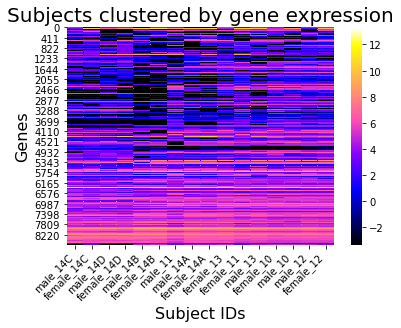

In [6]:
# because i like pretty colors: heatmap of clustered data
fig = seaborn.heatmap(expression_gene_sample_clustered, cmap = "gnuplot2")
fig.set_xticklabels(subject_names_clustered, rotation =45, ha='right')
fig.set_xlabel("Subject IDs", fontsize = 16)
fig.set_ylabel("Genes", fontsize=16)
fig.set_title("Subjects clustered by gene expression", fontsize = 20)
plt.show()

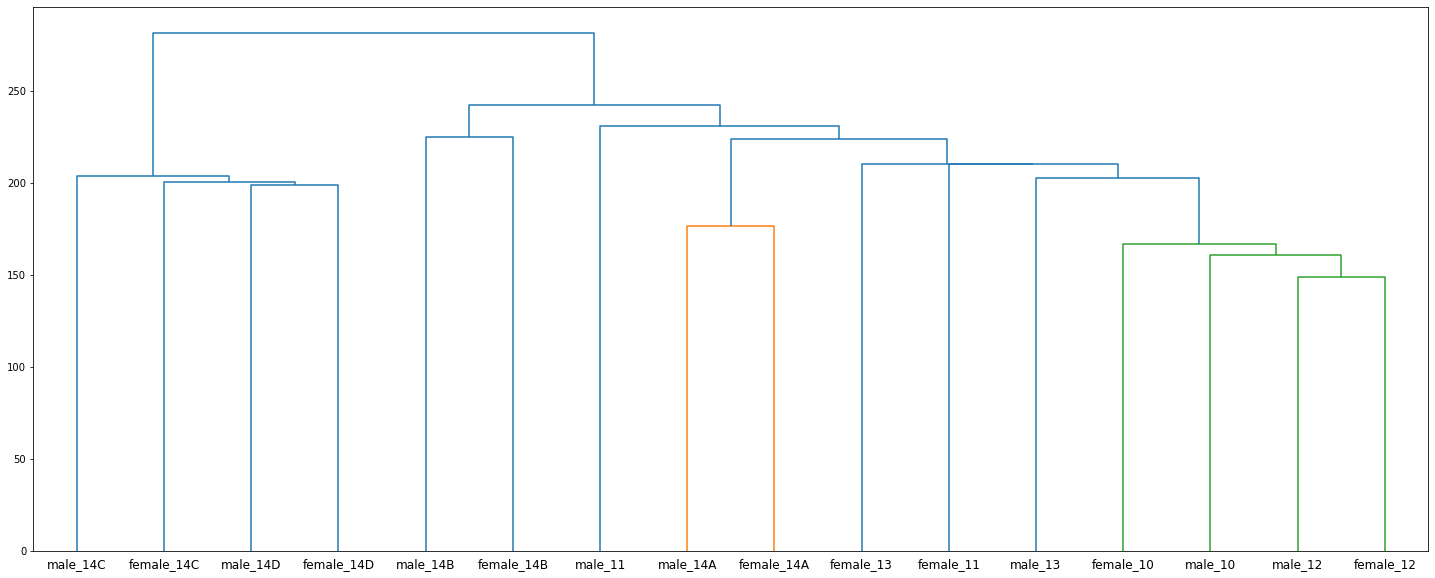

In [7]:
# dendogram of samples
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkage(expression_gene_clustered.T), labels=subject_name)
plt.show()

# Differential Expression

In [8]:
# transform data so can conduct least squares regression
diff_exp_df = med_vals.drop(['gene_name'], axis=1).T
diff_exp_df.columns = diff_exp_df.iloc[0]
diff_exp_df = diff_exp_df.drop('t_name', axis=0)
gender = []
stage = []
for x in diff_exp_df.index:
    if 'female' in x:
        gender.append('F')
    else:
        gender.append('M')
    if '10' in x:
        stage.append(str(10))
    elif '11' in x:
        stage.append(str(11))
    elif '12' in x:
        stage.append(str(12))
    elif '13' in x:
        stage.append(str(13))
    else:
        stage.append(str(14))
diff_exp_df['gender'] = gender
diff_exp_df['stage'] = stage
diff_exp_df

t_name,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078962,FBtr0078964,...,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114261,FBtr0114216,gender,stage
male_10,23.7126,10.9972,19.0679,6.31572,119.326,6.421,26.9295,8.75489,0,10.9343,...,0,6.75173,11.1518,33.3413,25.2094,2339.31,0.072563,2.0112,M,10
male_11,11.9678,0,0,3.93539,11.631,0,0,0,0,18.7835,...,0,0.260949,0.391747,1.05615,0.63843,34.0802,0,0,M,11
male_12,20.7675,0,14.8324,6.24434,120.137,10.366,0,25.0721,0,25.3615,...,0,12.6291,4.24049,9.83286,21.2812,927.592,0.09639,7.99414,M,12
male_13,13.5668,0,27.7939,69.9429,75.7781,22.9989,28.7926,16.9688,0,16.8559,...,0,54.2331,93.5741,414.873,517.077,4944.72,0.102807,2.0642,M,13
male_14A,18.8021,14.8053,22.2902,67.2086,72.8156,25.1528,29.6017,5.58643,10.9485,16.7983,...,37.9008,52.8401,87.2444,102.529,326.314,2251.11,0,3.14167,M,14
male_14B,26.8027,0,7.8464,7.60597,123.849,21.5378,0,0,28.5401,0,...,0,6.29405,22.5495,25.4487,54.7839,593.744,0,0,M,14
male_14C,22.8199,17.6017,13.8391,74.9791,81.2344,34.4381,21.3333,0,113.997,11.0904,...,34.6719,52.7495,73.1,71.7503,360.266,2493.09,0,1.5191,M,14
male_14D,11.6827,10.7293,12.9056,53.7403,59.658,17.5779,5.26425,13.2053,149.226,0,...,24.2141,15.487,56.5375,123.175,222.375,1651.99,0.126345,9.1908,M,14
female_10,21.8942,0,18.5707,44.7477,48.4808,14.6792,17.7423,12.3393,0,23.0644,...,4.6475,10.6574,41.3394,119.771,306.411,2578.83,0.902268,13.4757,F,10
female_11,13.9221,0,2.91918,16.8341,18.2385,4.00092,0,0,0,8.44549,...,0,0.793024,0.285725,0.672975,2.15362,76.5555,0,1.77143,F,11


In [9]:
# get pval per transcript from OLS 
# (need to do roundabout way since expressions are now type object in df which causes issues)
transcripts = diff_exp_df.columns[0:8613]
pval = []
for tran in range(0, len(transcripts)):
    arr_transcript = np.array(diff_exp_df[transcripts[tran]])
    arr_trans_float = []
    for val in range(0, len(arr_transcript)):
        arr_trans_float.append(float(arr_transcript[val]))
    df = pd.DataFrame({'y':arr_trans_float, 'x':stage})
    model = smf.ols(formula = "y ~ x", data = df)
    results = model.fit()
    pval.append(results.pvalues[1])


In [10]:
# get theoretical value 
pval_df = pd.DataFrame({'transcript': transcripts, 'pvalue': pval})
pval_df_sorted = pval_df.sort_values(by = "pvalue")
pval_df_sorted['uniform_points'] = range(0, len(pval_df_sorted))
pval_df_sorted['uniform_pval'] = (pval_df_sorted['uniform_points'] + 1) / len(pval_df_sorted)
pval_df_sorted

,transcript,pvalue,uniform_points,uniform_pval
1397,FBtr0346349,1.493146e-12,0,0.000116
5179,FBtr0071993,9.882004e-11,1,0.000232
2698,FBtr0076454,2.277321e-09,2,0.000348
2699,FBtr0346541,2.277326e-09,3,0.000464
4749,FBtr0345418,2.871607e-09,4,0.000581
...,...,...,...,...
4577,FBtr0087365,1.000000e+00,8608,0.999536
3136,FBtr0309722,1.000000e+00,8609,0.999652
5610,FBtr0070462,1.000000e+00,8610,0.999768
8008,FBtr0342600,1.000000e+00,8611,0.999884


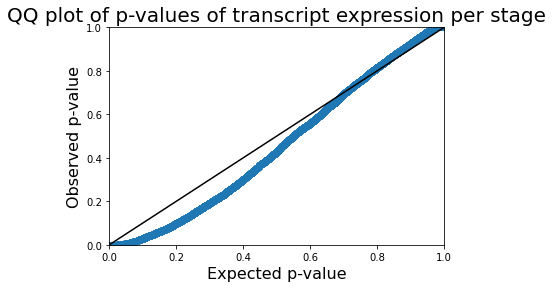

In [11]:
# plot QQ plot of pvalues
fig, ax = plt.subplots()
ax.scatter(pval_df_sorted["uniform_pval"], pval_df_sorted["pvalue"])
ax.plot([1,0], [1, 0], color = "black")

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("Expected p-value", fontsize = 16)
plt.ylabel("Observed p-value", fontsize = 16)
plt.title("QQ plot of p-values of transcript expression per stage", fontsize=20)
    
plt.show()

In [55]:
# determine genes with diff expression with FDR of 10% written to file
FDR_pval = np.array(pval_df_sorted['transcript'][multitest.multipletests(pval_df_sorted["pvalue"], method = "fdr_bh", alpha = 0.10)[0]])
np.savetxt('genes_diff_exp_FDR0.10.txt', FDR_pval, fmt='%s')

In [83]:
# repeat analysis controlling for sex
pval_sex = []
beta_sex = []
for tran in range(0, len(transcripts)):
    arr_transcript = np.array(diff_exp_df[transcripts[tran]])
    arr_trans_float = []
    for val in range(0, len(arr_transcript)):
        arr_trans_float.append(float(arr_transcript[val]))
    df = pd.DataFrame({'y':arr_trans_float, 'x':stage, 'z': gender})
    model = smf.ols(formula = "y ~ x + z", data = df)
    results = model.fit()
    pval_sex.append(results.pvalues[1])
    beta_sex.append(results.params[5])


In [94]:
# determine genes with diff expression with FDR of 10% written to file
pval_sex_df = pd.DataFrame({'transcript': transcripts, 'pvalue': pval_sex, 'beta': beta_sex})
FDR_pval_sex = np.array(pval_sex_df['transcript'][multitest.multipletests(pval_sex_df["pvalue"], method = "fdr_bh", alpha = 0.10)[0]])
np.savetxt('genes_diff_exp_gender_FDR0.10.txt', FDR_pval_sex, fmt='%s')
pval_sex_df['logP'] = -1 * np.log10(pval_sex_df['pvalue'])
pval_sex_df['FDR'] = multitest.multipletests(pval_sex_df["pvalue"], method = "fdr_bh", alpha = 0.10)[0]
pval_sex_df


,transcript,pvalue,beta,logP,FDR
0,FBtr0302347,0.112230,-0.126873,0.949893,False
1,FBtr0113885,0.569471,-3.123724,0.244529,False
2,FBtr0301810,0.026115,-1.598519,1.583112,False
3,FBtr0113895,0.522615,-17.735920,0.281818,False
4,FBtr0345179,0.028363,24.181817,1.547243,False
...,...,...,...,...,...
8608,FBtr0100884,0.460086,2.192677,0.337161,False
8609,FBtr0100886,0.424574,-75.267386,0.372046,False
8610,FBtr0100888,0.093324,105.643499,1.030007,False
8611,FBtr0114261,0.023447,-0.110608,1.629910,False


In [92]:
# calculate percent overlap
count = 0
for trans in range(0, len(FDR_pval_sex)):
    if FDR_pval_sex[trans] in FDR_pval:
        count += 1

percent_overlap = (count/len(FDR_pval))*100
percent_overlap


82.72980501392759

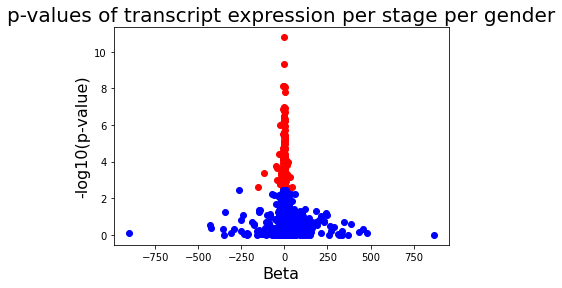

In [95]:
# plot volcano
fig, ax = plt.subplots()
ax.scatter(pval_sex_df["beta"][pval_sex_df['FDR'] == True], pval_sex_df["logP"][pval_sex_df['FDR'] == True], color = 'Red')
ax.scatter(pval_sex_df["beta"][pval_sex_df['FDR'] == False], pval_sex_df["logP"][pval_sex_df['FDR'] == False], color = 'Blue')
plt.xlabel("Beta", fontsize = 16)
plt.ylabel("-log10(p-value)", fontsize = 16)
plt.title("p-values of transcript expression per stage per gender", fontsize=20)
    
plt.show()
